
# Shoes price prediction


# **Objective:**
Predicting shoes price for the customers of Zshoes and deploy with the help of flask.


# Problem Statement:
Zshoes.com is one of the famous shoe manufacturers of India and has business in
almost every country in Asia and Europe. They are one of the best choices of all the
athletics and they make the best shoes for running. Due to pandemic, they are facing a
loss as Zshoes are a bit expensive. They want to know the correct price of all types of
shoes that they are manufacturing so that they won’t face any loss and at the same
time customers also buy the shoes. As a machine learning engineer, we have to build a
shoe-price prediction app that can predict the correct shoe price by taking inputs like
freight_value,payment_type, etc.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb

In [3]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score,KFold

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import zscore

import statsmodels.api as sm

from scipy import stats

from statsmodels.stats.stattools import durbin_watson

import statsmodels.stats.api as gq

from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFE

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [5]:
df=pd.read_csv('product_data.csv')
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


# Understanding of Data

In [6]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
count,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000
mean,1.205280,79.818332,16.126716,1.089495,1.352040,2.671703,124.124508
std,0.715244,56.057932,5.943237,0.689100,0.652362,2.524321,124.418064
min,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,35.990000,12.690000,1.000000,1.000000,1.000000,55.550000
50%,1.000000,63.900000,15.470000,1.000000,1.000000,1.000000,95.400000
75%,1.000000,109.900000,18.670000,1.000000,2.000000,3.000000,155.840000
max,21.000000,270.000000,36.000000,26.000000,4.000000,24.000000,3195.730000


In [7]:
df.columns

Index(['order_item_id', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [8]:
df.shape

(101335, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_item_id         101335 non-null  int64  
 1   price                 101335 non-null  float64
 2   freight_value         101335 non-null  float64
 3   payment_sequential    101335 non-null  int64  
 4   payment_type          101335 non-null  int64  
 5   payment_installments  101335 non-null  int64  
 6   payment_value         101335 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 5.4 MB


As we can see there are no null values in the data

We can consider numeric features to be Order_item_id,freight_value and payment_value

Other features are encoded categorical features.

Price is also numeric and it is the target column

ID is an unnecessary column

In [10]:
df['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

**INSIGNIFICANT COLUMNS**

In [11]:
#Removing

df=df.drop('order_item_id',axis=1)

As target column is numeric and according to our problem statement we are going to do
regression analysis

# EDA

***UNIVARIATE ANALYSIS***

In [12]:
for i in df.columns:
    print(i,end=' ')
    print(df[i].nunique())

price 4188
freight_value 3267
payment_sequential 26
payment_type 4
payment_installments 24
payment_value 21231


In [13]:
df.payment_type.value_counts()

1    74164
2    20170
3     5499
4     1502
Name: payment_type, dtype: int64

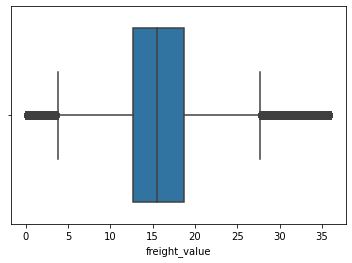

In [14]:
sb.boxplot(df['freight_value'])
mp.show()

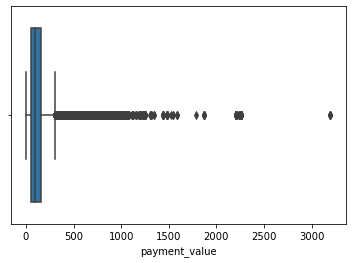

In [15]:
sb.boxplot(df['payment_value'])
mp.show()

For these numerical columns we have noticed that there are extreme outliers present in the data.
We should treat this using any of the outliers removal / capping method.

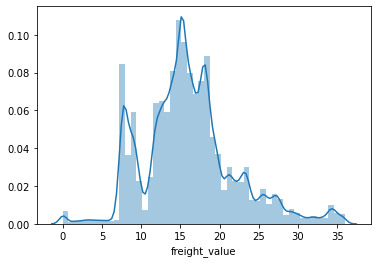

In [16]:
sb.distplot(df['freight_value'])
mp.show()

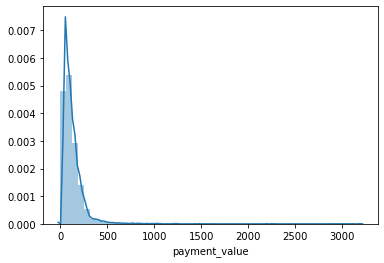

In [17]:
sb.distplot(df['payment_value'])
mp.show()

We can observe payment_value column has heavily right skewed data

And very negligible amount of skewness in Freight_value

In [18]:
#Target Feature

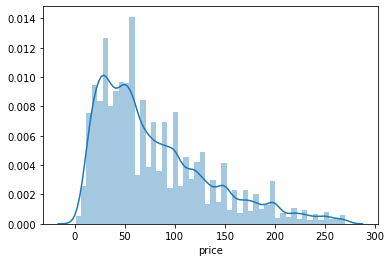

In [19]:
sb.distplot(df['price'])
mp.show()

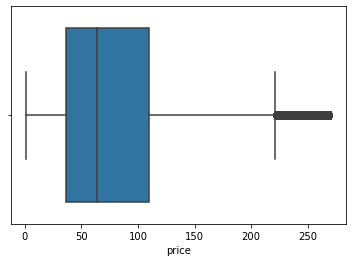

In [20]:
sb.boxplot(df['price'])
mp.show()

As we can notice the data is right skewed and so we can notice that it has outliers

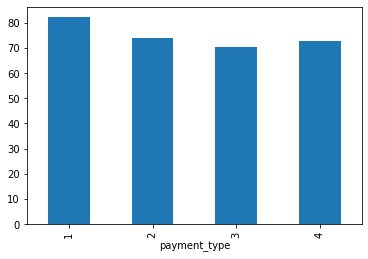

In [21]:
df.groupby('payment_type')['price'].mean().plot(kind='bar')
mp.show()

In [22]:
df.columns

Index(['price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [23]:
df['payment_installments'].value_counts()

1     53326
2     12475
3     10340
4      6816
5      4943
10     4121
6      3577
8      3400
7      1482
9       573
12      106
15       53
11       24
18       23
24       19
13       16
14       13
16        6
17        6
20        6
21        5
0         3
23        1
22        1
Name: payment_installments, dtype: int64

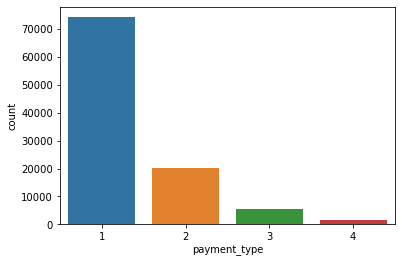

In [24]:
sb.countplot(df.payment_type)
mp.show()

We can observe each categorical variable having many categories

In payment type, Only the last category has less count

***BIVARIATE ANALYSIS***

In [25]:
df.columns

Index(['price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

***Numerical Features with Target***

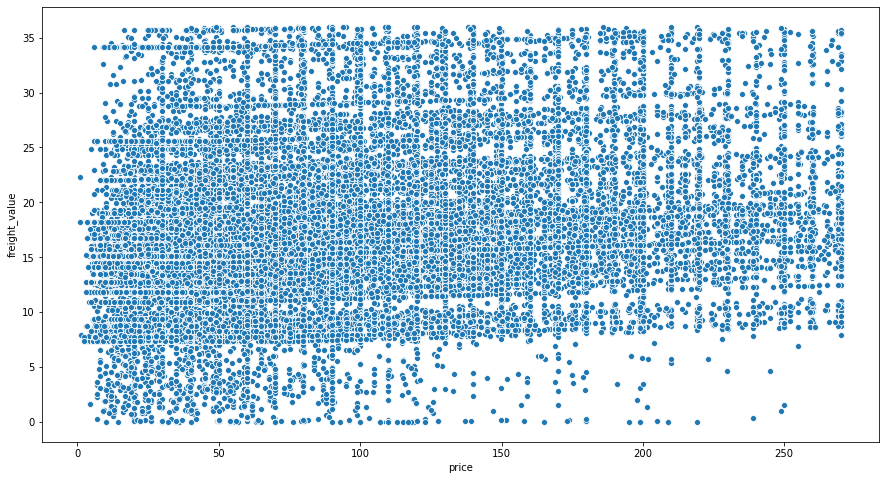

In [26]:
mp.figure(figsize=(15,8))
sb.scatterplot(df['price'],df['freight_value'])
mp.show()

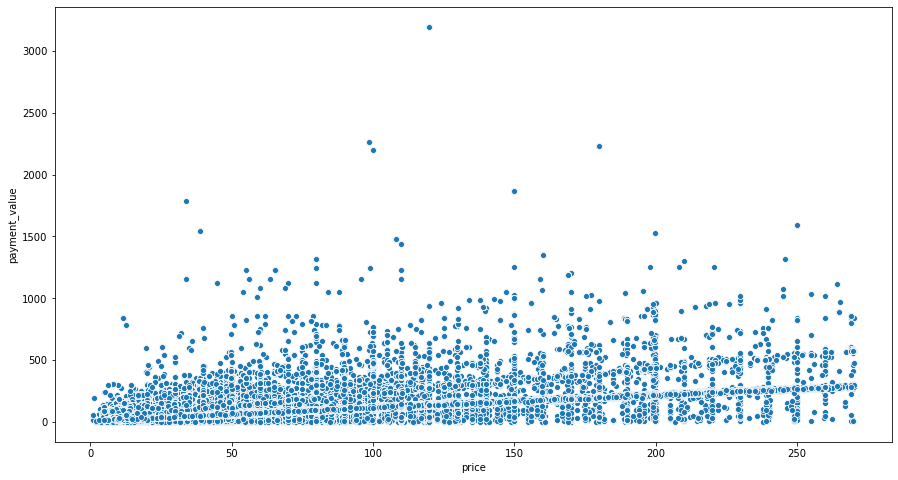

In [27]:
mp.figure(figsize=(15,8))
sb.scatterplot(df['price'],df['payment_value'])
mp.show()

We can notice that there is more chance that for any price there can be any freight value.This #states there is no relation

And for any price between 0-300, the payment value will be in mostly between 0 to 1000.

*** Relation of Categorical variables with Target***

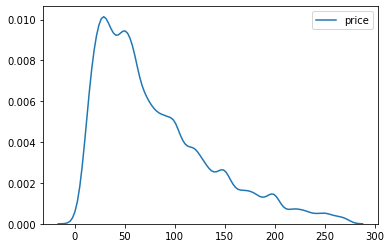

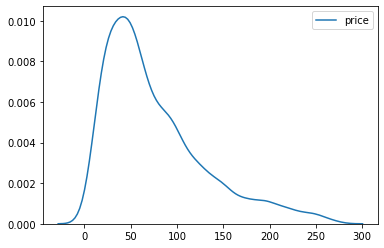

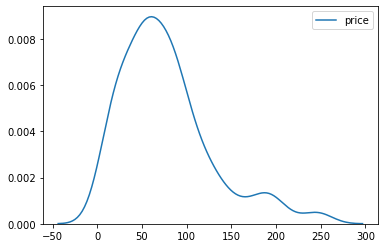

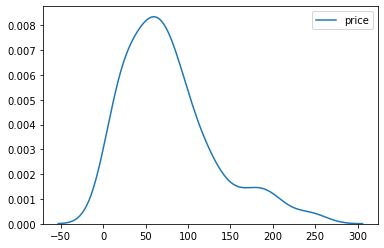

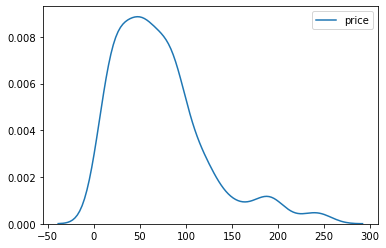

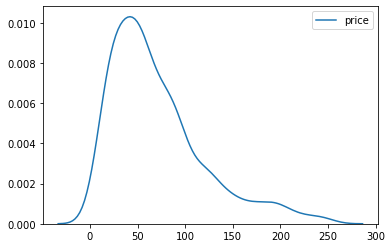

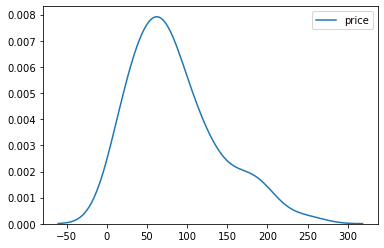

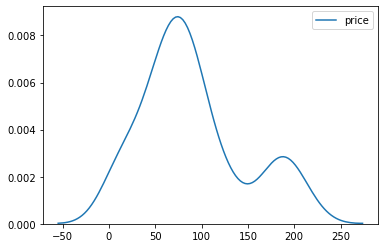

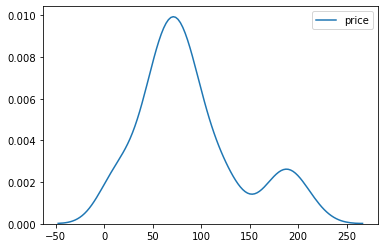

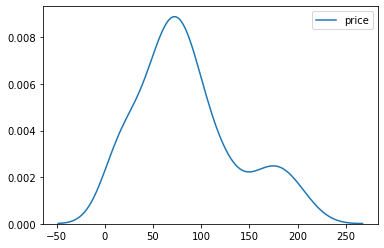

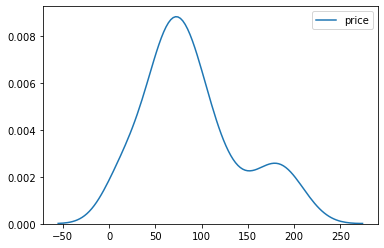

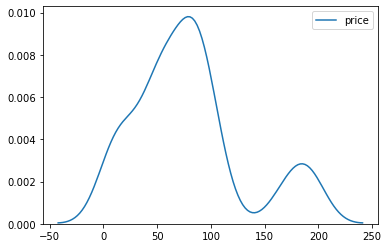

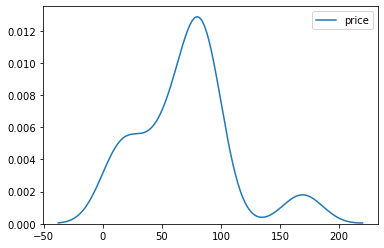

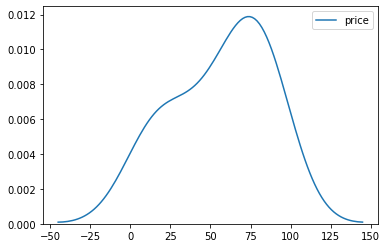

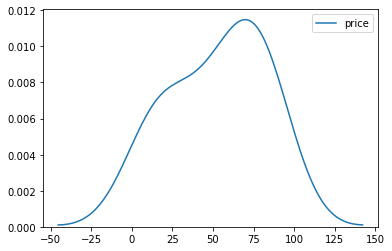

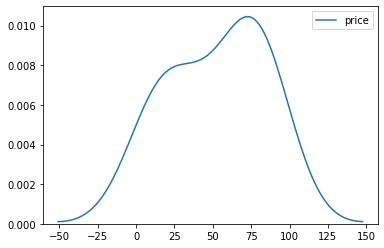

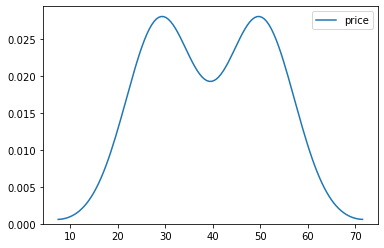

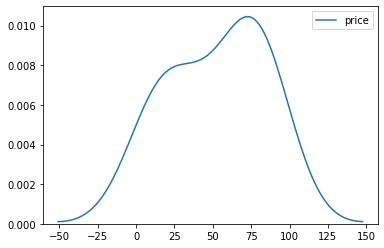

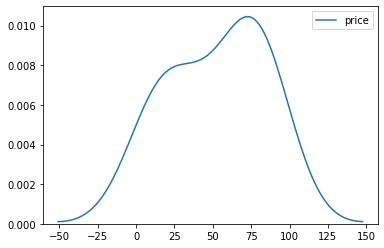

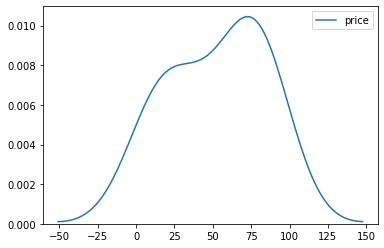

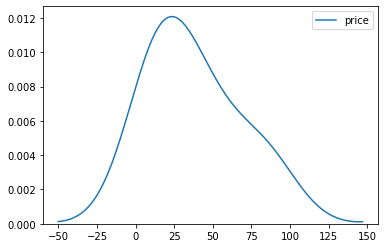

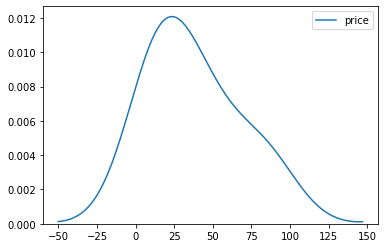

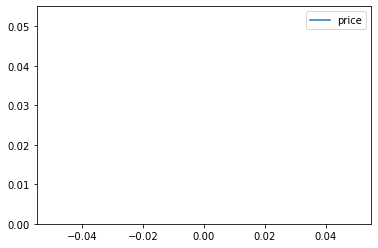

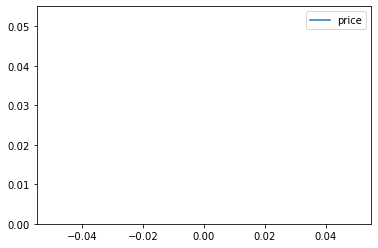

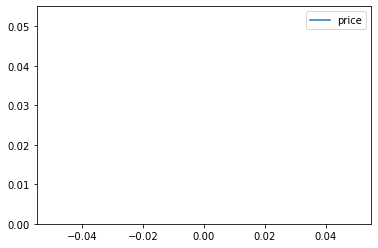

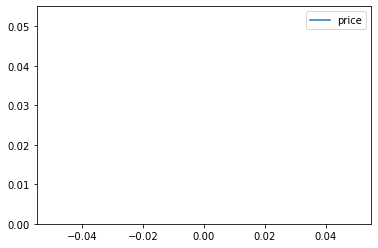

In [28]:
for i in df['payment_sequential'].unique():
    sb.kdeplot(df['price'][df['payment_sequential']==i])
    mp.show()

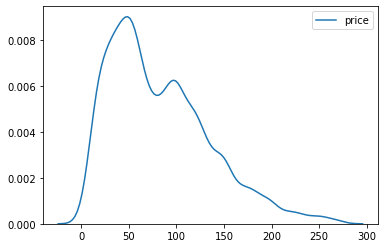

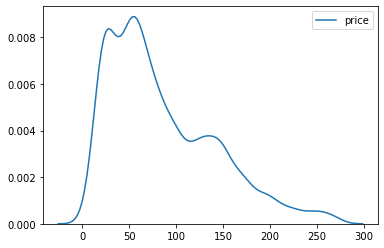

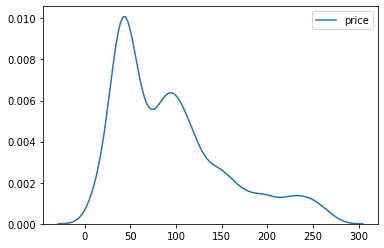

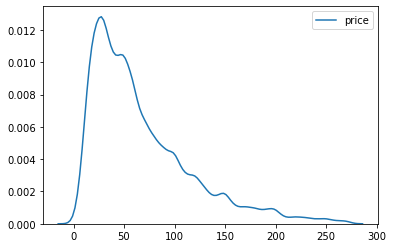

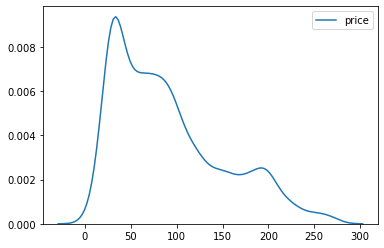

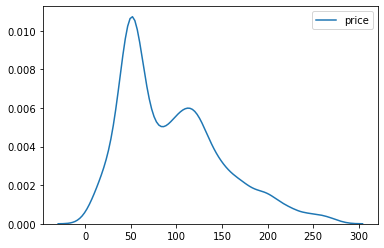

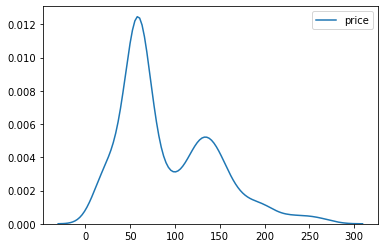

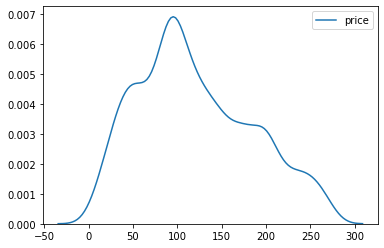

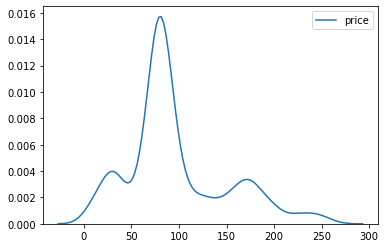

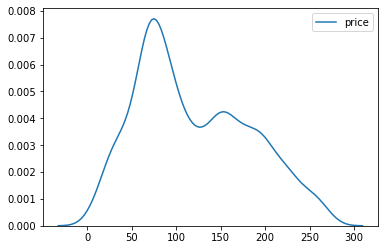

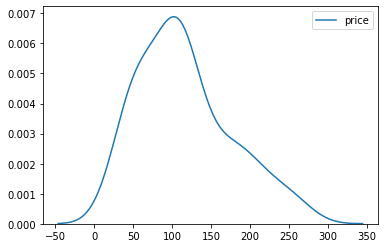

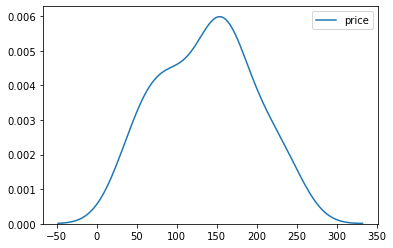

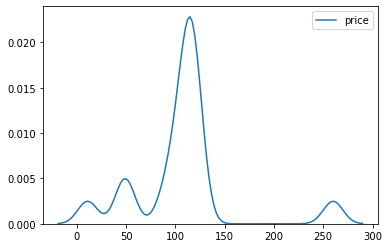

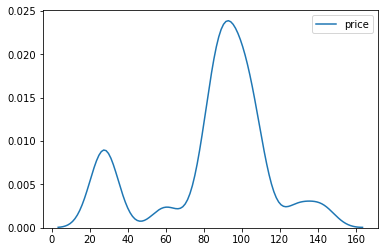

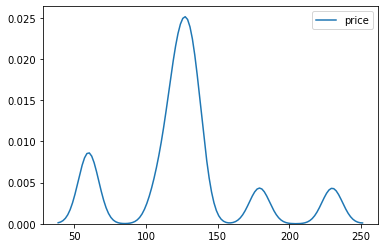

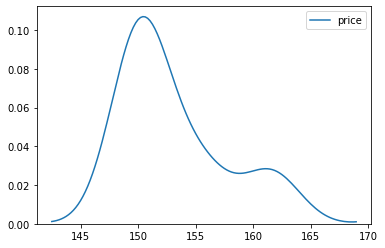

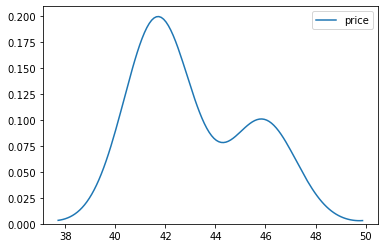

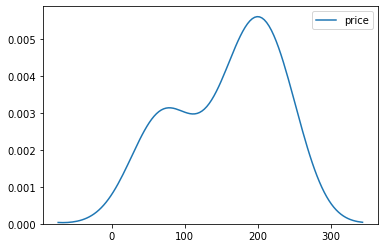

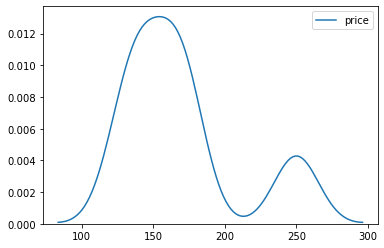

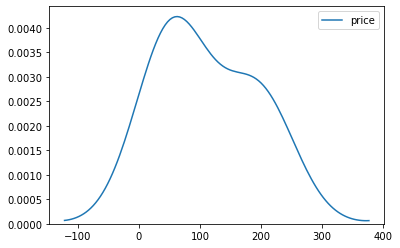

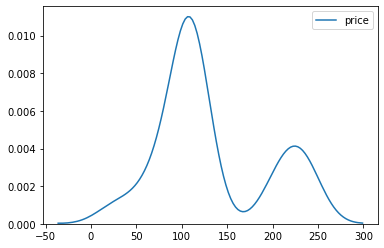

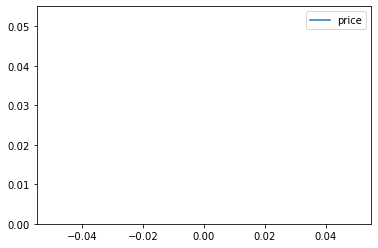

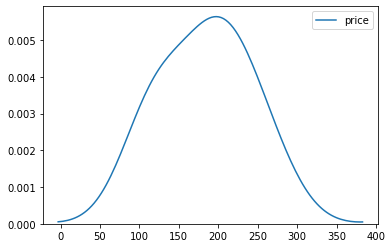

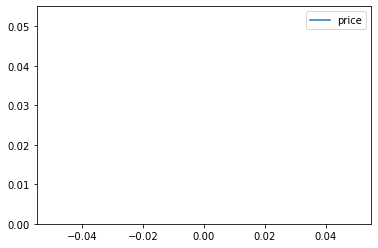

In [29]:
for i in df['payment_installments'].unique():
    sb.kdeplot(df['price'][df['payment_installments']==i])
    mp.show()

We can notice that there are not much of values for one category.

***Multi-variate Analysis***

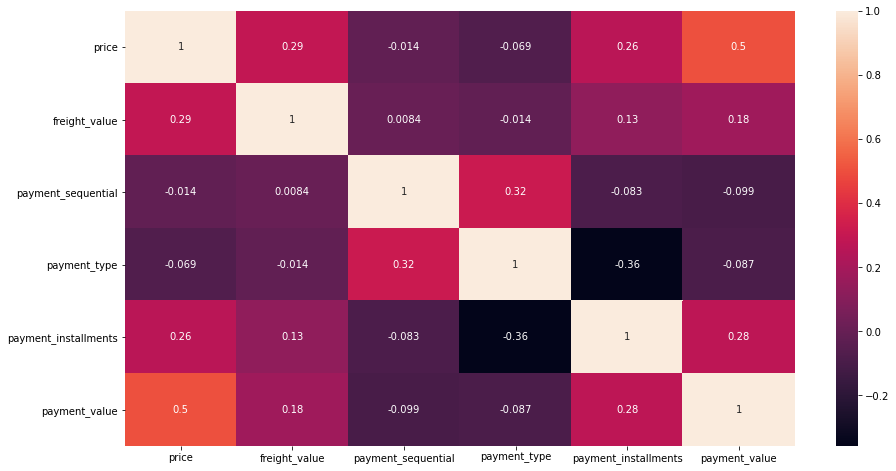

In [30]:
mp.figure(figsize=(15,8))
sb.heatmap(df.corr(),annot=True)

We can notice that there is no collinearity or very light collinearity between the features.

# **Data Pre-processing**

***Outlier Treatment***

In [31]:
df.columns

Index(['price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [32]:
num=df[['freight_value','payment_value']]
num

,freight_value,payment_value
0,13.29,72.19
1,19.93,259.83
2,17.87,216.87
3,12.79,25.78
4,18.14,218.04
...,...,...
101330,34.19,356.76
101331,20.03,139.88
101332,16.95,116.85
101333,8.72,64.71


In [33]:
for col in num.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)

    print(len(df[(df[col]<ll) | (df[col]>ul)]))

5534
4477


Here we can see that there are 5534 outliers rows in freight_value

Here we can see that there are 4477 outliers rows in payment_value

We can cap the outliers to not lose the data

In [34]:
df_cpy=df.copy()

In [35]:
for col in df_cpy[['freight_value','payment_value']]:
    q1 = df_cpy[col].quantile(0.25)
    q3 = df_cpy[col].quantile(0.75)
    iqr = q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    
    for ind in df_cpy[col].index:
        if(df_cpy.loc[ind,col] < ll):
            df_cpy.loc[ind,col] = ll
        if(df_cpy.loc[ind,col]>ul):
            df_cpy.loc[ind,col]=ul

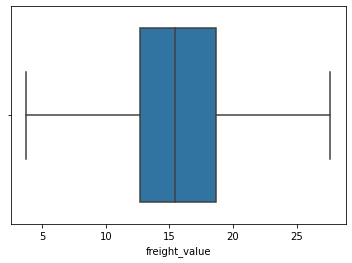

In [36]:
sb.boxplot(df_cpy['freight_value'])

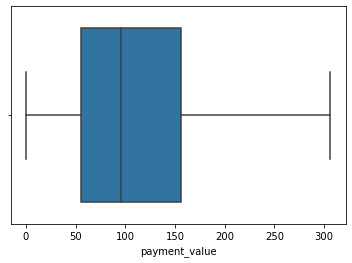

In [37]:
sb.boxplot(df_cpy['payment_value'])

***Null Values Detection***

In [38]:
df_cpy.isnull().sum()

price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [39]:
#We can notice there are no null values as we have seen in the data info.

In [40]:
x=df_cpy.drop(['price'],1)
y=df_cpy['price']

In [41]:

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [42]:
calc_vif(x)

,variables,VIF
0,freight_value,6.889912
1,payment_sequential,3.761705
2,payment_type,5.037866
3,payment_installments,2.525469
4,payment_value,3.895743


**Scaling**

In [43]:
x=x.copy()
x[['freight_value','payment_value']]=x[['freight_value','payment_value']].apply(zscore)
x

,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,-0.494556,1,1,2,-0.554531
1,0.730097,1,1,3,1.908037
2,0.350159,1,1,5,1.344235
3,-0.586774,1,1,2,-1.163611
4,0.399957,1,1,3,1.359590
...,...,...,...,...,...
101330,2.152095,1,2,1,2.517577
101331,0.748540,1,1,3,0.333826
101332,0.180478,1,1,3,0.031583
101333,-1.337427,1,1,3,-0.652697


**Splitting**

In [44]:
Xt,xte,Yt,yte=train_test_split(x,y,test_size=0.3,random_state=110)

# Model Building

In [45]:
xc=sm.add_constant(x)

In [46]:
basemodel=sm.OLS(y,xc).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                 2.056e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:15:23   Log-Likelihood:            -5.1631e+05
No. Observations:              101335   AIC:                         1.033e+06
Df Residuals:                  101329   BIC:                         1.033e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   70.5737      0.391    180.539      0.000      69.808      71.340
freight_value            6.6185      0.129     51.257      0.000       6.365       6.872
payment_sequential       6.7180      0.192     35.032      0.000       6.342       7.094
payment_type             0.5280      0.214      2.463      0.014       0.108       0.948
payment_installments     0.4535      0.056      8.105      0.000       0.344       0.563
payment_value           37.4781      0.138    271.984      0.000      37.208      37.748
==============================================================================
Omnibus:                     4439.964   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13858.140
Skew:                          -0.136   Prob(JB):                         0.00
Kurtosis:                       4.791   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Target is numeric

In [48]:
#Target is skewed
df_cpy.price.skew()

1.0853288244552386

In [49]:
s,pval=stats.shapiro(basemodel.resid)
print(pval)
if pval>0.05:
    print('Residuals Normal')
else:
    print('Residuals Not normal')

0.0
Residuals Not normal


In [50]:
ypred=basemodel.predict(xc)

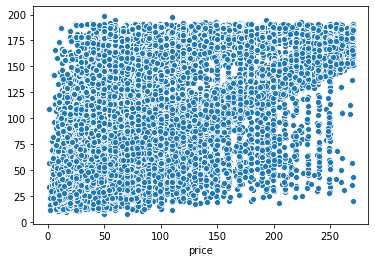

In [51]:
sb.scatterplot(y,ypred)

In [52]:
basemodel.condition_number

13.604244253722714

In [53]:
calc_vif(x)

,variables,VIF
0,freight_value,1.079090
1,payment_sequential,3.664525
2,payment_type,3.375350
3,payment_installments,1.772732
4,payment_value,1.228704


In [54]:
#There is no or very moderate multicollinearity which is negligible

In [55]:
durbin_watson(basemodel.resid)

1.2431383044251658

In [56]:
f,pval,s=gq.het_goldfeldquandt(basemodel.resid,xc)
if pval>=0.05:
    print('Homoscedastic')
else:
    print('Hetroscedastic')

Homoscedastic


**Assumptions**

Target is numeric 

Not normal distribution

No Multicollinearlity

No Autocorrelation

Homoscedasticity

In [57]:
#Very low r2 score

In [58]:
ypred=basemodel.predict(xc)

In [59]:
rmse=np.sqrt(mean_squared_error(y,ypred))
rmse

39.49397072645259

In [60]:
#Error is also High

**Feature Selection**

In [61]:
basemodel.pvalues[basemodel.pvalues < 0.05][1:]

freight_value            0.000000e+00
payment_sequential      2.943529e-267
payment_type             1.376429e-02
payment_installments     5.313885e-16
payment_value            0.000000e+00
dtype: float64

***We can see that all the pvalues are less than 0.05 which indicates all the features are 
significant***

In [62]:
def feature_select(mod):
    rfe = RFE(estimator=mod)  
    rfe_model = rfe.fit(x,y)
    print(rfe_model.ranking_)

    rank= pd.DataFrame()
    rank['Feature']=x.columns
    rank['Rank']=rfe_model.ranking_

    rank=rank[rank['Rank']<=3]

    fea=rank['Feature'].values
    print(fea)

In [63]:
feature_select(LinearRegression())

[2 1 3 4 1]
['freight_value' 'payment_sequential' 'payment_type' 'payment_value']


In [64]:
feature_select(DecisionTreeRegressor())

[1 3 4 2 1]
['freight_value' 'payment_sequential' 'payment_installments'
 'payment_value']


In [65]:
feature_select(RandomForestRegressor())

[1 3 4 2 1]
['freight_value' 'payment_sequential' 'payment_installments'
 'payment_value']


From above feature selection using RFE, we can say that almost all the features are helpful.

In [66]:
n = x.shape[0]
p = x.shape[1]

In [67]:
def build(mod):
    models=mod.fit(x,y)
    k  = KFold(n_splits=5,shuffle=True, random_state=110)
    scores_r2 = cross_val_score(mod,x,y,cv=k,scoring='r2')
    rmse = cross_val_score(mod,x,y,cv=k,scoring='neg_root_mean_squared_error')
    print('Rsquared:',scores_r2.mean())
    print('Adjusted_r2:',(1-(1-(scores_r2.mean()))*(n-1)/(n-p-1)))
    print('RMSE:',np.abs(rmse.mean()))

In [68]:
build(LinearRegression())

Rsquared: 0.5033991751636611
Adjusted_r2: 0.5033746707856037
RMSE: 39.50052661536393


In [69]:
build(DecisionTreeRegressor())

Rsquared: 0.7621088434365065
Adjusted_r2: 0.7620971048840406
RMSE: 27.340424938204325


In [70]:
build(RandomForestRegressor())

Rsquared: 0.8460235144703546
Adjusted_r2: 0.8460159166214896
RMSE: 21.98026386439315


From above rmse score we can see that RandomForestRegressor is working best. Linear Regression is not so good because of non normal data.